### Activity 4 (Thursday)

- Show a plot of the total number of responses.
- Show a plot of the response by the sales channel.
- Show a plot of the response by the total claim amount.
- Show a plot of the response by income.
- (Optional) plot any interesting findings/insights(minimum three) that describe some interesting facts about your data set and its input variables as well as relationships with the target feature.
- Clean your notebook and make it readable and presentable with a good documentation that summarizes the Data Cleaning, Exploration(including plots) Steps that you have performed.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
pd.options.display.max_rows = 100
## Install xlrd package to load Excel files
#!conda install openpyxl
#!conda install xlrd

In [41]:
#let's import the file Data_Marketing_Customer_Analysis_Round3.csv

df = pd.read_csv('Data_Marketing_Customer_Analysis_Round3.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   region                         10689 non-null  object
 1   customer_lifetime_value        10689 non-null  int64 
 2   response                       10689 non-null  object
 3   coverage                       10689 non-null  object
 4   education                      10689 non-null  object
 5   effective_to_date              10689 non-null  object
 6   month                          10689 non-null  object
 7   employment_status              10689 non-null  object
 8   gender                         10689 non-null  object
 9   income                         10689 non-null  int64 
 10  location_code                  10689 non-null  object
 11  marital_status                 10689 non-null  object
 12  monthly_premium_auto           10689 non-null  int64 
 13  m

In [43]:
#Get the numeric data into dataframe called num_df

num_df = df.select_dtypes(include=[np.number])

num_df.describe()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
count,10689.000000,10689.000000,10689.000000,10689.000000,10689.000000,10689.000000,10689.000000,10689.000000
mean,8011.906727,51750.243989,93.190196,15.144073,48.100571,0.384975,2.980821,434.227243
std,6877.557889,24778.053035,34.413111,10.086110,27.934300,0.910210,2.399497,292.550878
min,1898.000000,10037.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,4014.000000,29335.000000,68.000000,6.000000,24.000000,0.000000,1.000000,269.000000
50%,5776.000000,50398.000000,83.000000,14.000000,48.000000,0.000000,2.000000,383.000000
75%,8991.000000,72131.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.000000
max,83325.000000,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.000000


In [40]:
#Get the categorical data into a dataframe called cat_df

cat_df = df.select_dtypes(exclude=[np.number])

cat_df.describe()

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
count,10689,10689,10689,10689,10689,10689,10689,10689,10689,10689,10689,10689,10689,10689,10689,10689
unique,4,2,3,5,59,2,5,2,3,3,3,9,4,4,6,3
top,west region,no,basic,bachelor,1/27/11,jan,employed,f,suburban,married,personal auto,personal l3,offer1,agent,four-door car,medsize
freq,3678,9316,6523,3210,236,5684,6658,5469,6742,6199,7937,4006,4394,4019,5424,7528


<AxesSubplot:xlabel='response', ylabel='Count'>

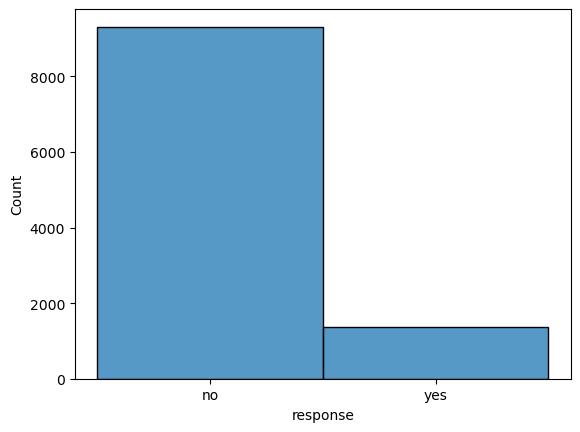

In [5]:
#Show a plot of the total number of responses.

sns.histplot(data=cat_df, x='response')

<AxesSubplot:xlabel='sales_channel', ylabel='count'>

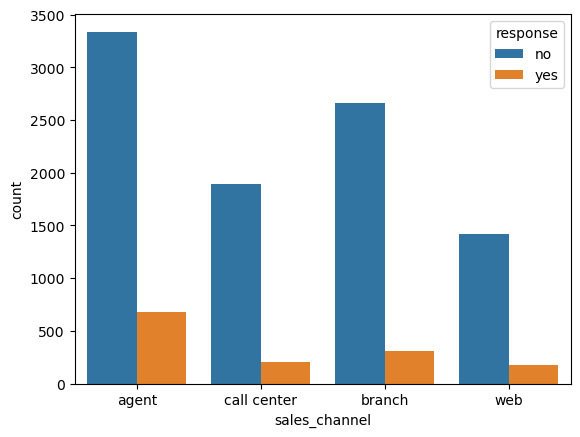

In [6]:
# Show a plot of the response by the sales channel.

sns.countplot(data=cat_df, x='sales_channel', hue='response')


<AxesSubplot:xlabel='total_claim_amount', ylabel='response'>

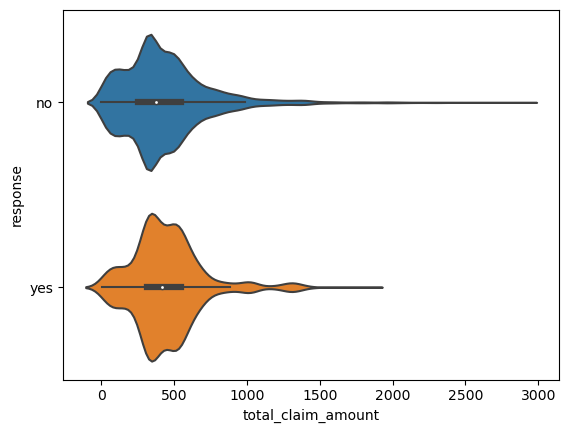

In [7]:
# Show a plot of the response by the total claim amount.

sns.violinplot(data=df, x='total_claim_amount', y='response', figsize = (20,15))

<AxesSubplot:xlabel='income', ylabel='response'>

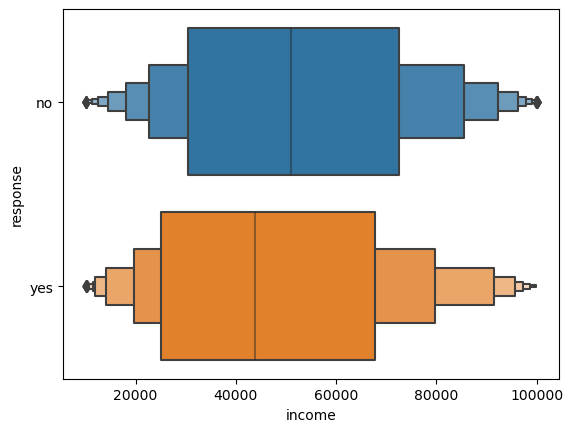

In [8]:
# Show a plot of the response by income.

sns.boxenplot(data=df, x='income', y='response')

### (Optional) plot any interesting findings/insights(minimum three) that describe some interesting facts about your data set and its input variables as well as relationships with the target feature.


<AxesSubplot:xlabel='monthly_premium_auto', ylabel='customer_lifetime_value'>

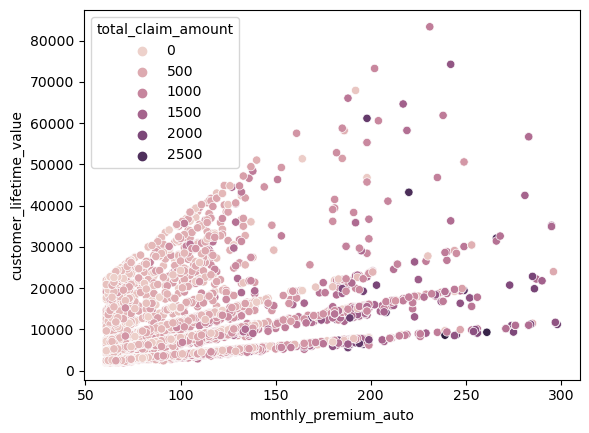

In [9]:
'''From the previous activity, I wanted to check the relation of this two variables (which have a strong correlation)
with the target variable
'''

sns.scatterplot(data=df, x='monthly_premium_auto', y='customer_lifetime_value', hue='total_claim_amount')


<AxesSubplot:xlabel='number_of_policies', ylabel='customer_lifetime_value'>

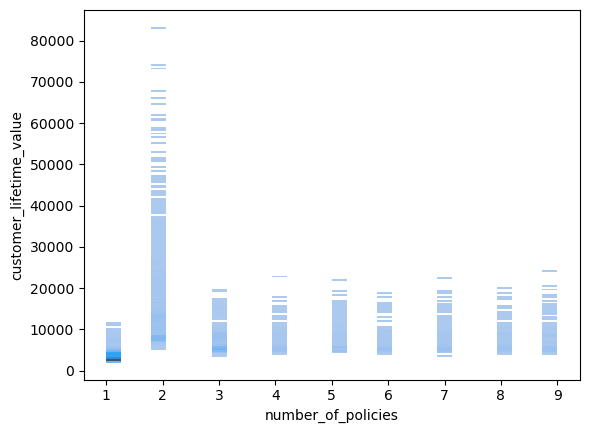

In [37]:
#checking the assumption by visualising different vehicle classes

sns.histplot(data=df, x='number_of_policies', y='customer_lifetime_value')


<AxesSubplot:xlabel='total_claim_amount', ylabel='monthly_premium_auto'>

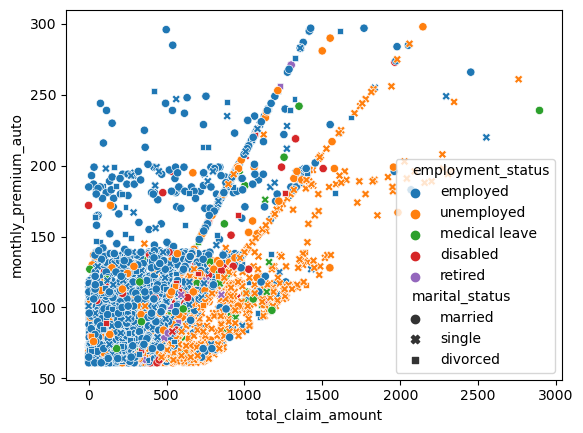

In [42]:
# checking the same hue as above on a graph resulting from a different correlation

sns.scatterplot(data=df, y='monthly_premium_auto', x='total_claim_amount', hue='employment_status', style='marital_status')
